In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DA 1/heart.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
print("First 10 Rows")
df.head(10)

First 10 Rows


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
print("Last 10 Rows")
df.tail(10)

Last 10 Rows


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
908,63,M,ASY,140,187,0,LVH,144,Y,4.0,Up,1
909,63,F,ASY,124,197,0,Normal,136,Y,0.0,Flat,1
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0
911,59,M,ASY,164,176,1,LVH,90,N,1.0,Flat,1
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
df.shape

(918, 12)

In [ ]:
df.isna().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
df2 = df.dropna(subset=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease'])
print(" Number of Empty values/rows in the dataset = ",df.shape[0] - df2.shape[0])

 Number of Empty values/rows in the dataset =  0


BarPlots for Data set with outliers


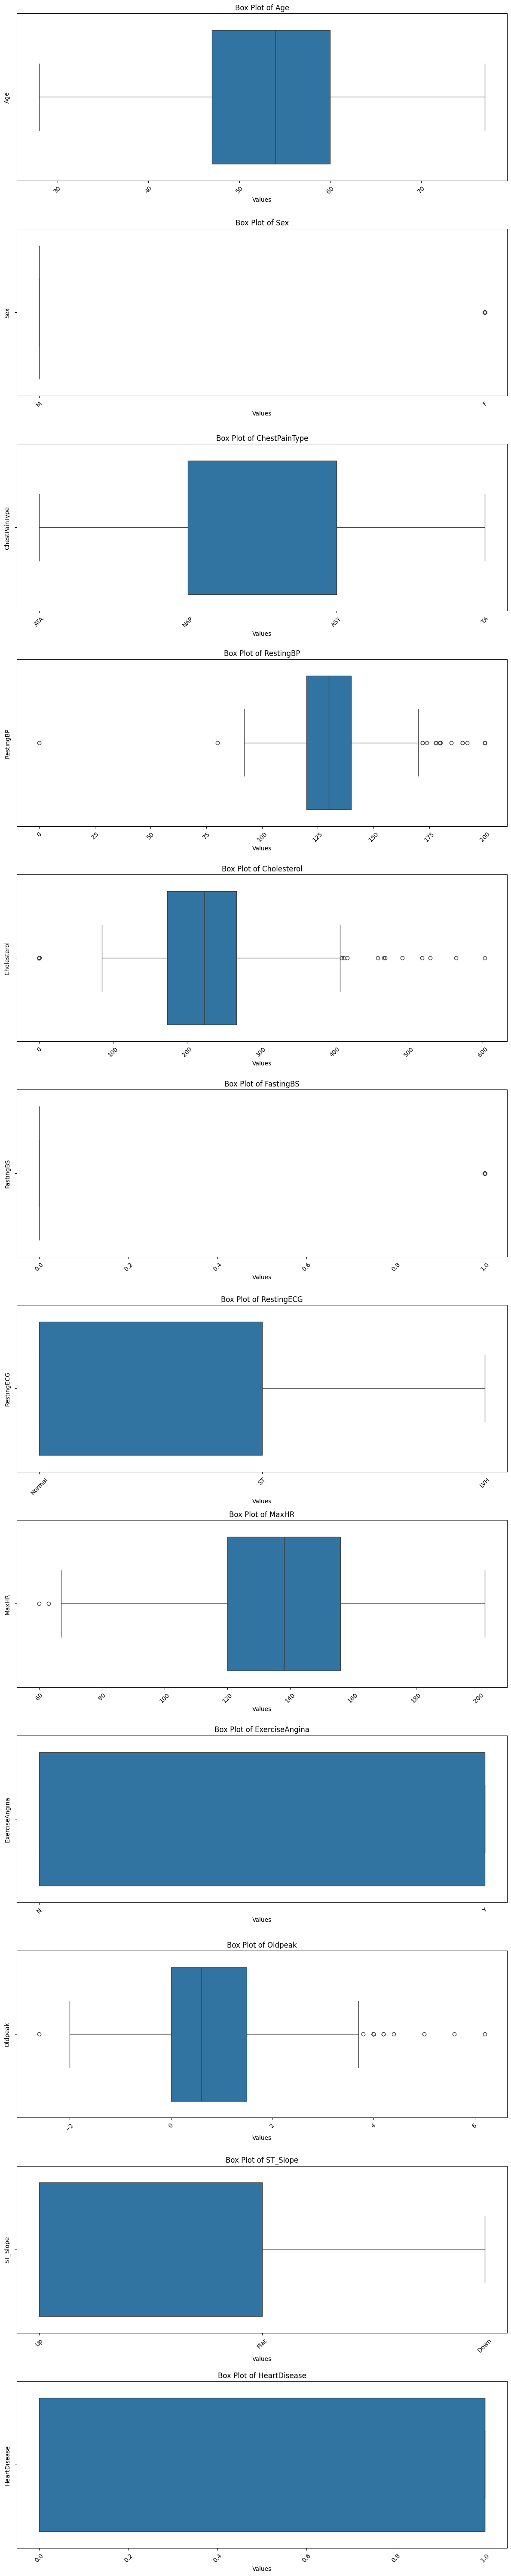

In [ ]:
print("BarPlots for Data set with outliers")
cols = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']
fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(12, len(cols) * 5))
for ax, feature in zip(axes, cols):
    sns.boxplot(x=df2[feature], ax=ax)
    ax.set_title(f'Box Plot of {feature}')
    ax.set_xlabel('Values')
    ax.set_ylabel(feature)
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
def cleandata(df):
    df_numeric = df.select_dtypes(include=[np.number])
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)
    IQR = Q3 - Q1
    mask = ~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)
    return df.loc[mask]

In [ ]:
df_cleaned = cleandata(df2)
print("Number of outliers removed are ",df2.shape[0] - df_cleaned.shape[0])

Number of outliers removed are  330


BarPlots for Data set with outliers


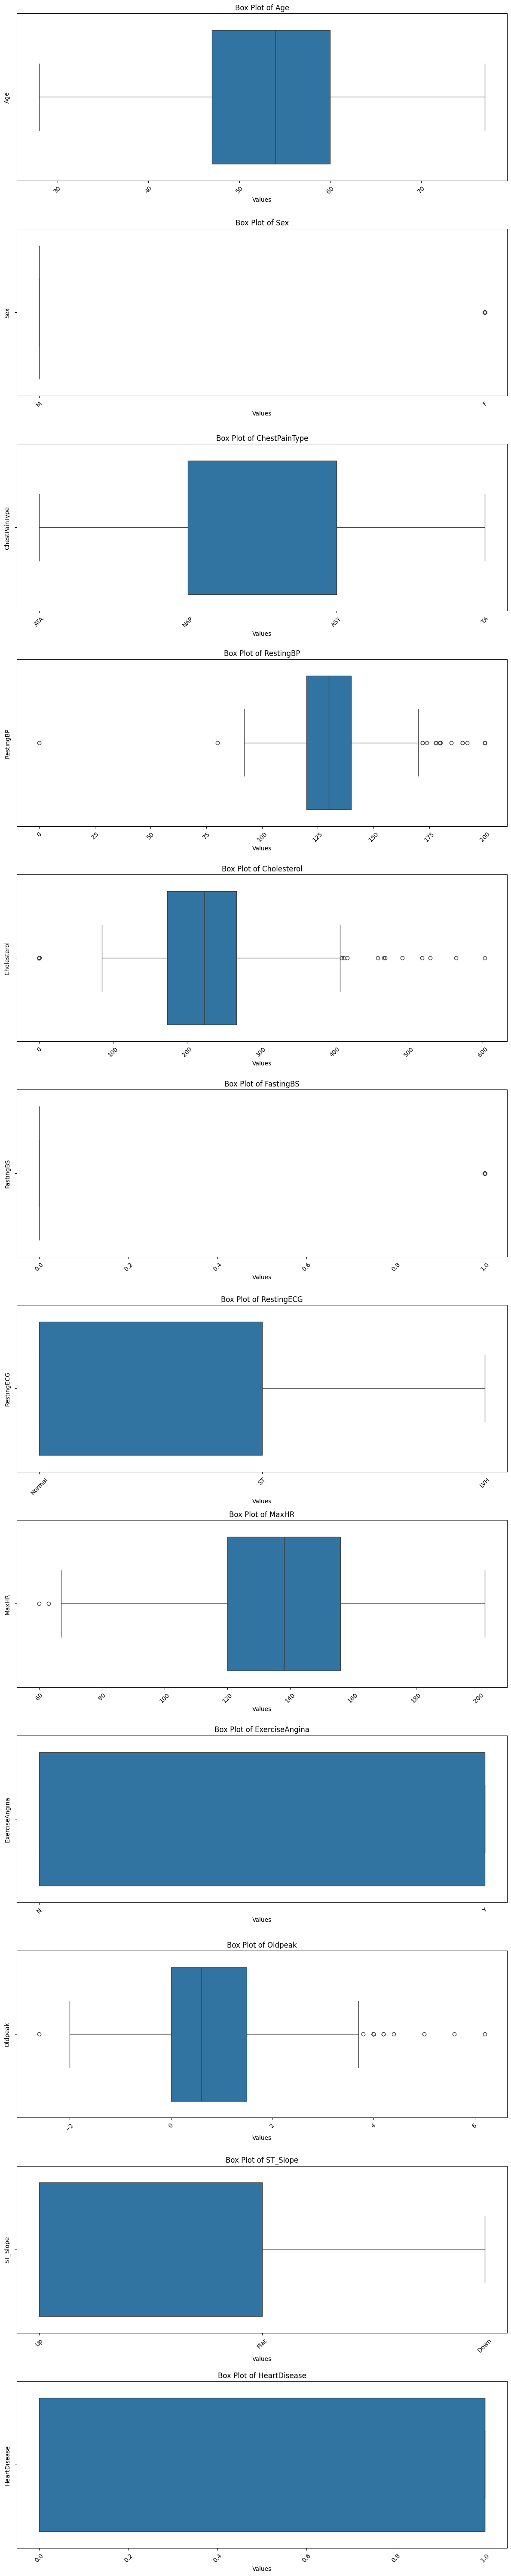

In [ ]:
print("BarPlots for Data set with outliers")
cols = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']
fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(12, len(cols) * 5))
for ax, feature in zip(axes, cols):
    sns.boxplot(x=df2[feature], ax=ax)
    ax.set_title(f'Box Plot of {feature}')
    ax.set_xlabel('Values')
    ax.set_ylabel(feature)
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
df_clean = cleandata(df_cleaned)
print("Number of outliers removed are ",df_cleaned.shape[0] - df_clean.shape[0])

Number of outliers removed are  8


BarPlots for Data set without outliers


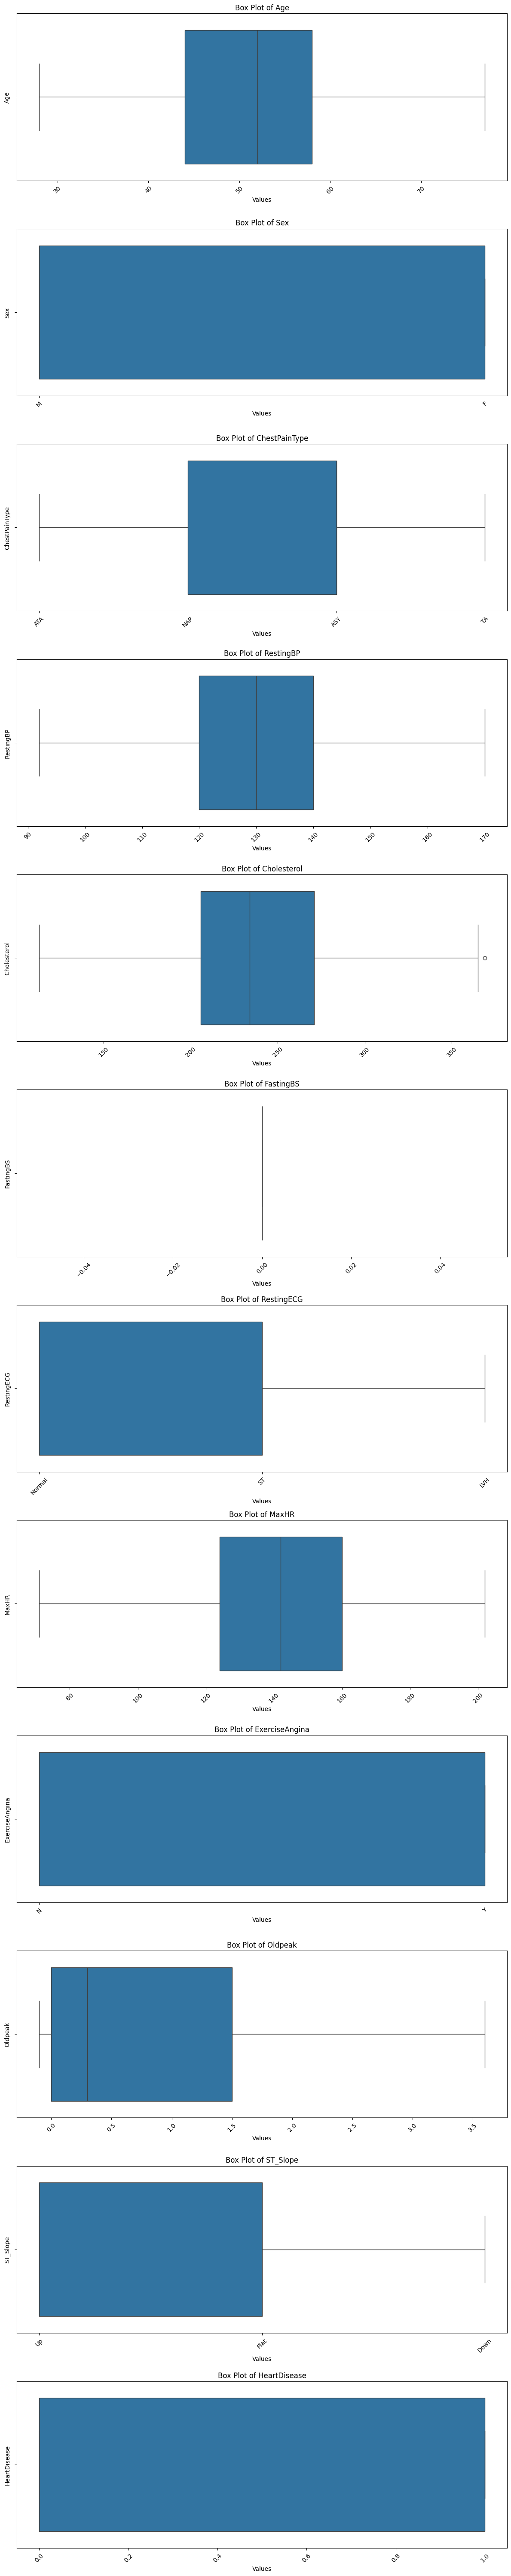

In [ ]:
print("BarPlots for Data set without outliers")
cols = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']
fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(12, len(cols) * 5))
for ax, feature in zip(axes, cols):
    sns.boxplot(x=df_clean[feature], ax=ax)
    ax.set_title(f'Box Plot of {feature}')
    ax.set_xlabel('Values')
    ax.set_ylabel(feature)
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

Histogram for Data set with outliers


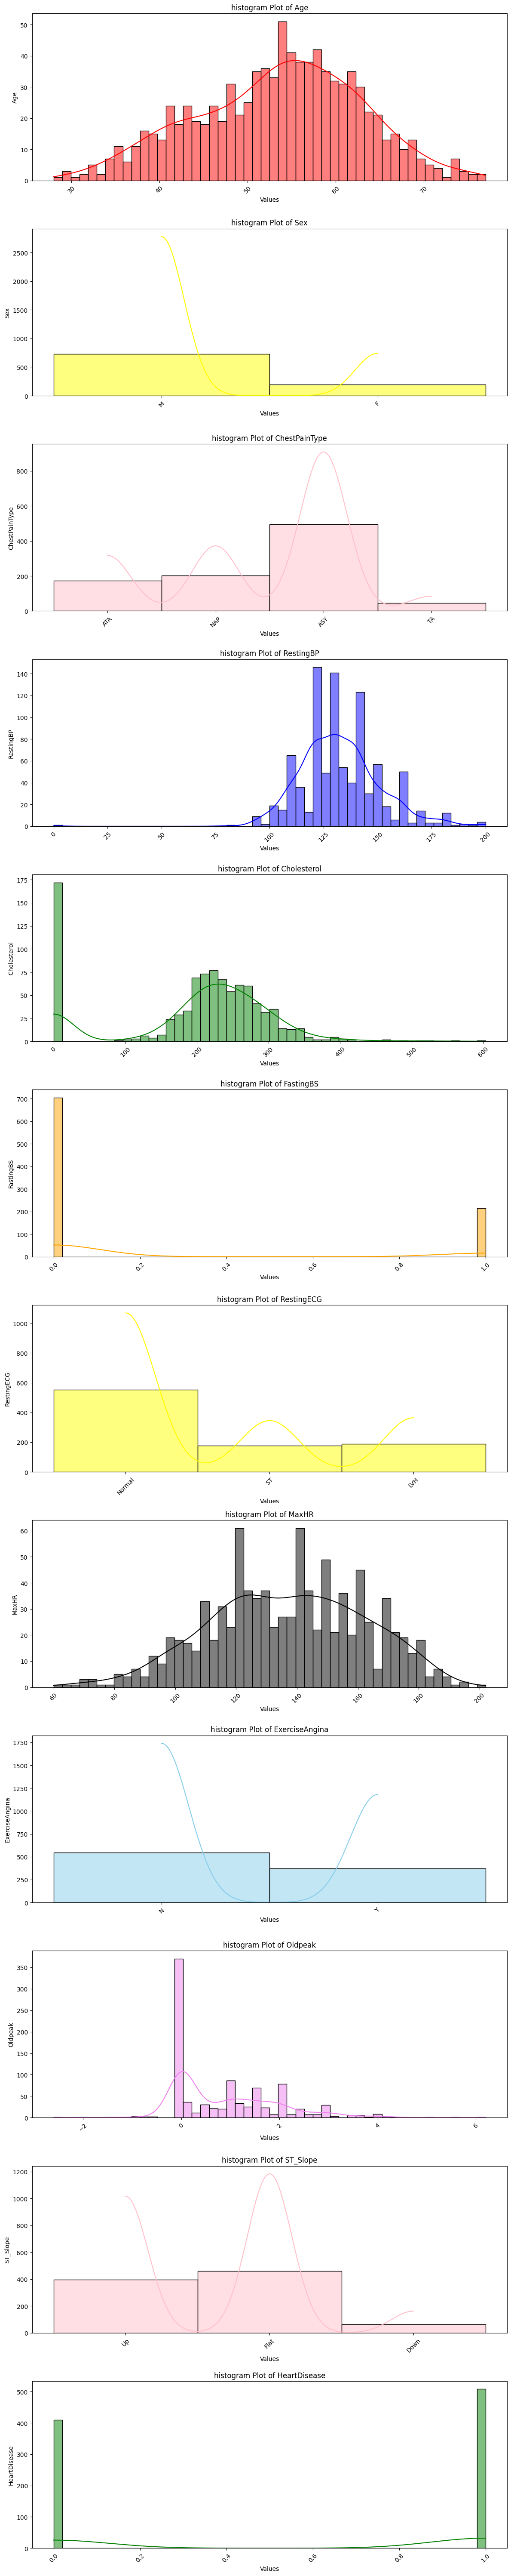

In [ ]:
print("Histogram for Data set with outliers")
cols = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']
colors = ["red","yellow","pink", "blue", "green", "orange", "yellow", "black","skyblue","violet","pink","green"]
fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(12, len(cols) * 5))
for ax, feature , color in zip(axes, cols,colors):
    sns.histplot(x=df2[feature], bins=50, kde=True, ax=ax, color=color)
    ax.set_title(f'histogram Plot of {feature}')
    ax.set_xlabel('Values')
    ax.set_ylabel(feature)
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

Scatter plot for Data set with outliers


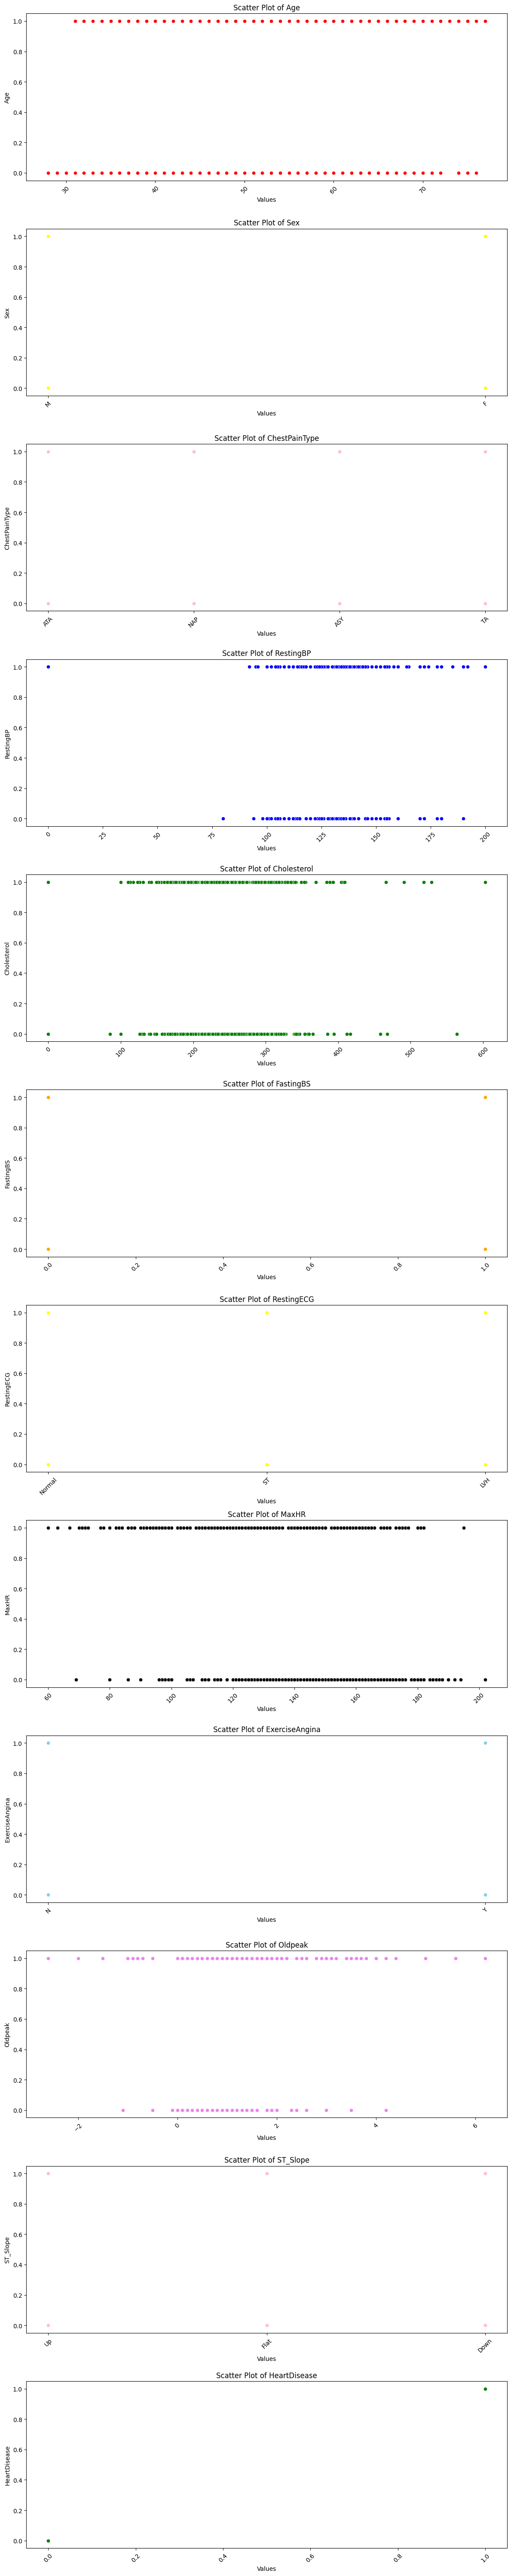

In [ ]:
print("Scatter plot for Data set with outliers")
cols = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']
colors = ["red","yellow","pink", "blue", "green", "orange", "yellow", "black","skyblue","violet","pink","green"]
fig, axes = plt.subplots(nrows=len(cols), ncols=1, figsize=(12, len(cols) * 5))
for ax, feature , color in zip(axes, cols,colors):

    sns.scatterplot(x=df2[feature], y=df2["HeartDisease"], ax=ax, color=color)
    ax.set_title(f'Scatter Plot of {feature}')
    ax.set_xlabel('Values')
    ax.set_ylabel(feature)
    ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

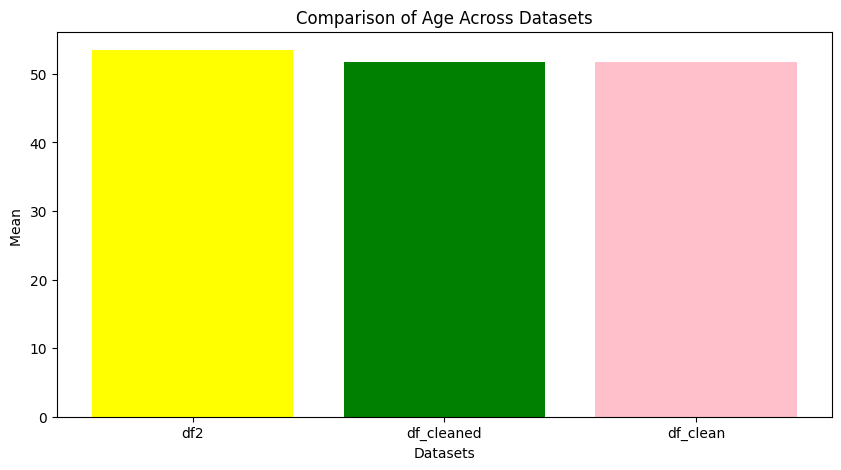

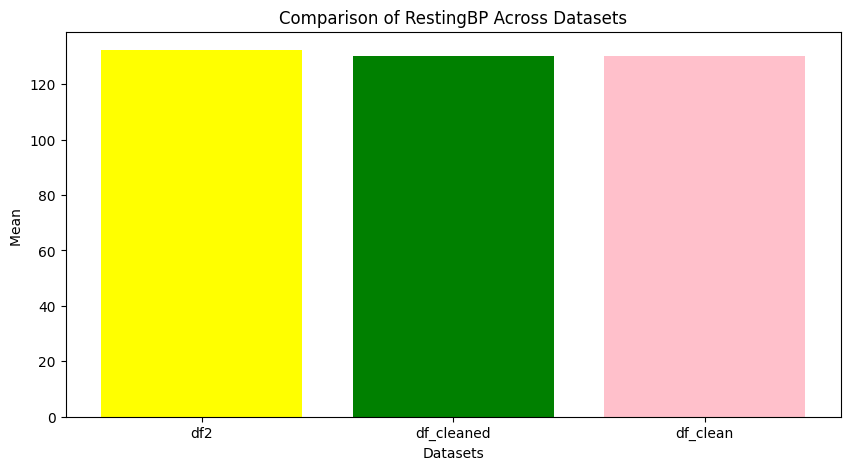

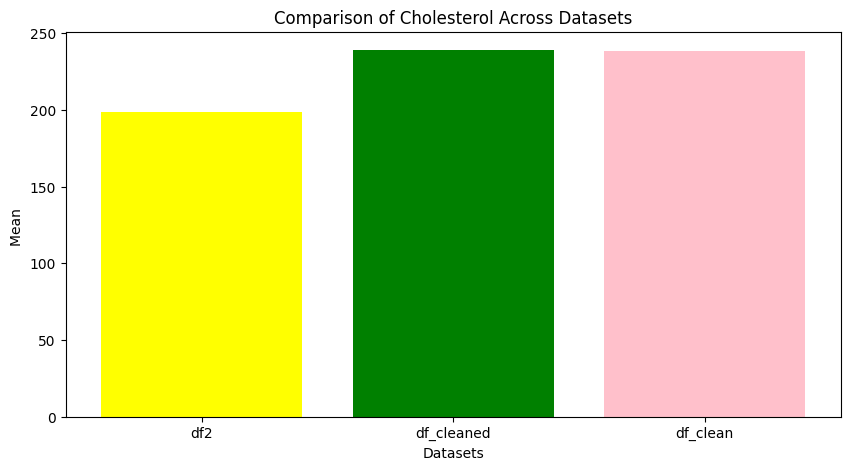

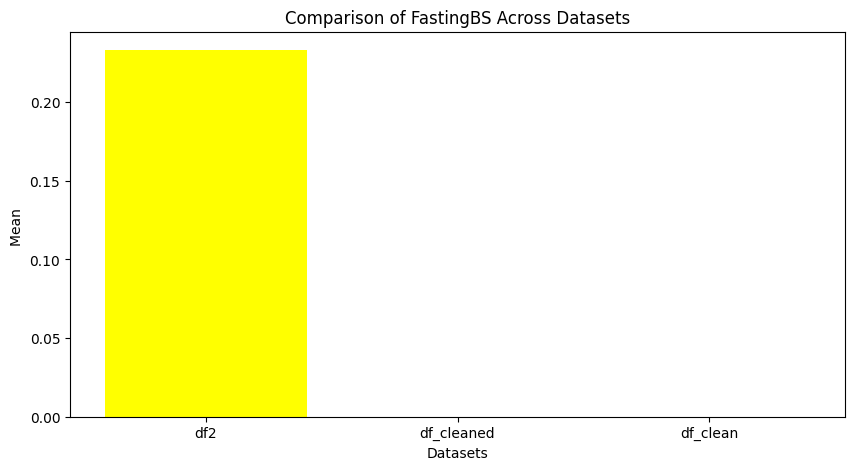

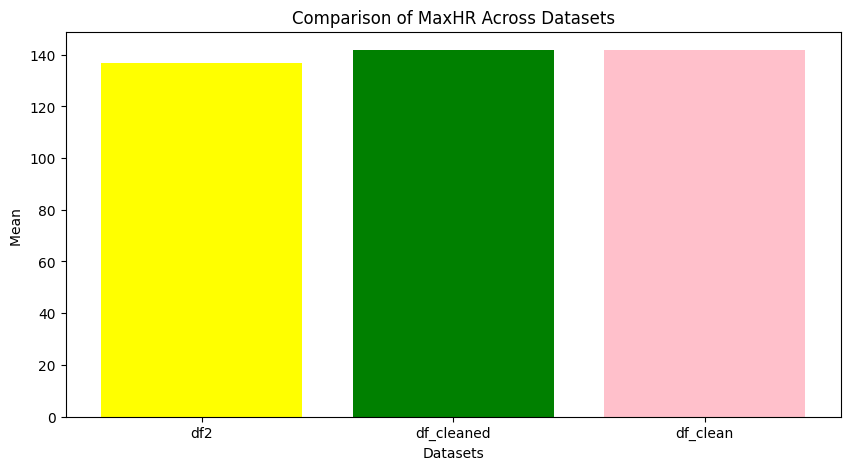

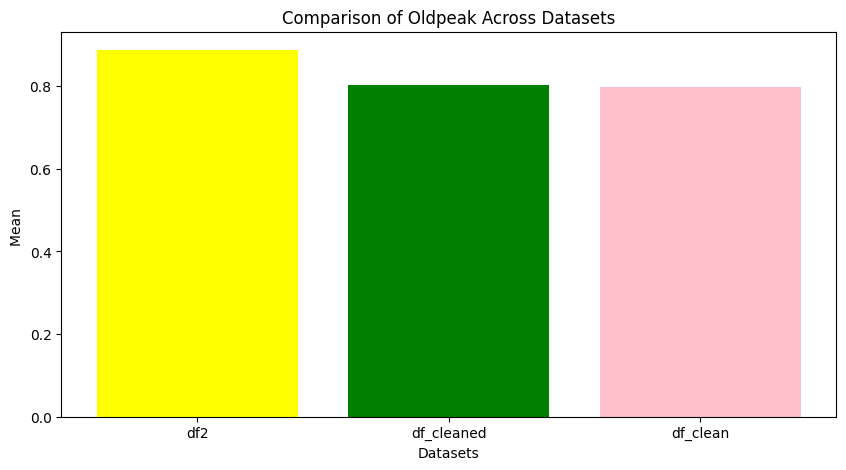

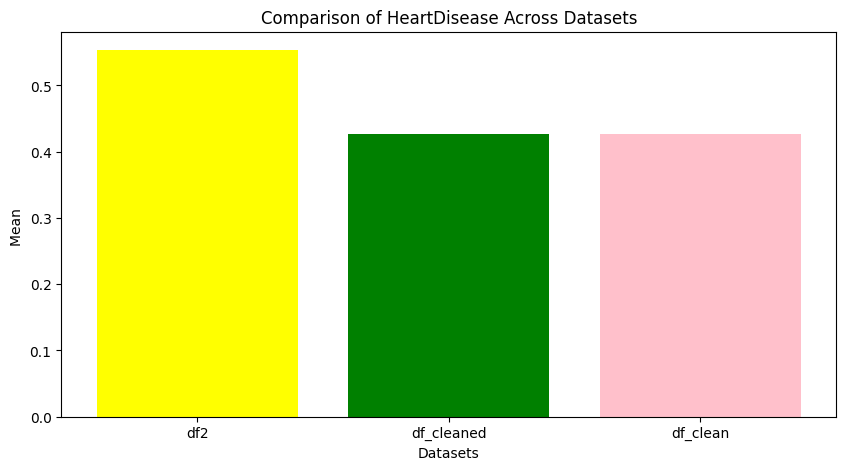

In [ ]:
def plot_bar_comparison(datasets, dataset_names):
    for column in datasets[0].select_dtypes(include=['number']).columns:
        plt.figure(figsize=(10, 5))
        values = [dataset[column].mean() for dataset in datasets]
        plt.bar(dataset_names, values, color=['yellow', 'green', 'pink'])
        plt.xlabel('Datasets')
        plt.ylabel('Mean ')
        plt.title(f'Comparison of {column} Across Datasets')
        plt.show()
plot_bar_comparison([df2, df_cleaned, df_clean], ["df2", "df_cleaned", "df_clean"])

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
df_clean.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 580 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             580 non-null    int64  
 1   Sex             580 non-null    object 
 2   ChestPainType   580 non-null    object 
 3   RestingBP       580 non-null    int64  
 4   Cholesterol     580 non-null    int64  
 5   FastingBS       580 non-null    int64  
 6   RestingECG      580 non-null    object 
 7   MaxHR           580 non-null    int64  
 8   ExerciseAngina  580 non-null    object 
 9   Oldpeak         580 non-null    float64
 10  ST_Slope        580 non-null    object 
 11  HeartDisease    580 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 58.9+ KB


In [ ]:
df_clean=pd.get_dummies(df_clean,columns=["Sex","ChestPainType","RestingECG","ExerciseAngina","ST_Slope"],drop_first=True).astype(int)

In [ ]:
df_clean.head(1)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1


In [ ]:
X=df_clean.drop("HeartDisease",axis=1)
y=df_clean["HeartDisease"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:

import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)


def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 20)

evaluate_model(y_test, y_pred_xgb, "XGBoost")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_svm, "SVM")

--- XGBoost ---
Accuracy: 0.8362
Precision: 0.8364
Recall: 0.8362
F1 Score: 0.8362
--------------------
--- Random Forest ---
Accuracy: 0.8534
Precision: 0.8535
Recall: 0.8534
F1 Score: 0.8534
--------------------
--- SVM ---
Accuracy: 0.8621
Precision: 0.8621
Recall: 0.8621
F1 Score: 0.8621
--------------------


Text(50.722222222222214, 0.5, 'Truth')

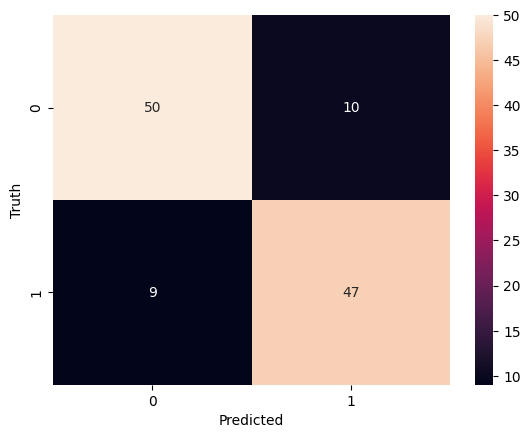

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

Text(50.722222222222214, 0.5, 'Truth')

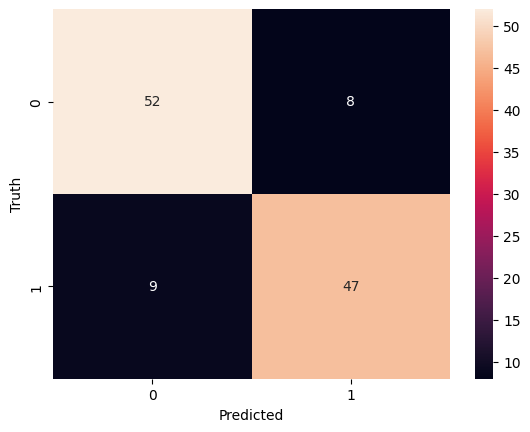

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

<Axes: >

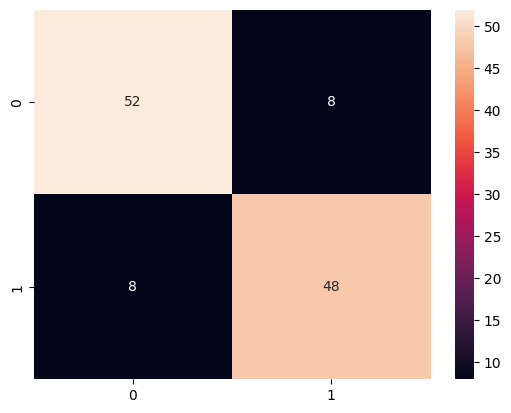

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred_svm)
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
print("Classification Report")
print(classification_report(y_test,y_pred_xgb))

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        60
           1       0.82      0.84      0.83        56

    accuracy                           0.84       116
   macro avg       0.84      0.84      0.84       116
weighted avg       0.84      0.84      0.84       116



In [ ]:
print("Classification Report")
print(classification_report(y_test,y_pred_rf))

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.87      0.86        60
           1       0.85      0.84      0.85        56

    accuracy                           0.85       116
   macro avg       0.85      0.85      0.85       116
weighted avg       0.85      0.85      0.85       116



In [ ]:
print("Classification Report")
print(classification_report(y_test,y_pred_svm))

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        60
           1       0.86      0.86      0.86        56

    accuracy                           0.86       116
   macro avg       0.86      0.86      0.86       116
weighted avg       0.86      0.86      0.86       116



In [ ]:
import numpy as np
from statsmodels.stats.weightstats import ztest

heart_disease_group = df_clean[df_clean['HeartDisease'] == 1]['Cholesterol']
no_heart_disease_group = df_clean[df_clean['HeartDisease'] == 0]['Cholesterol']

# Perform the Z-test
z_statistic, p_value = ztest(heart_disease_group, no_heart_disease_group)

print(f"Z-statistic: {z_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in cholesterol levels between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in cholesterol levels between the two groups.")

Z-statistic: 2.08
P-value: 0.038
Reject the null hypothesis. There is a significant difference in cholesterol levels between the two groups.


In [ ]:
from scipy import stats

heart_disease_group = df_clean[df_clean['HeartDisease'] == 1]['Cholesterol']
no_heart_disease_group = df_clean[df_clean['HeartDisease'] == 0]['Cholesterol']

# Perform the T-test
t_statistic, p_value = stats.ttest_ind(heart_disease_group, no_heart_disease_group)

print(f"T-statistic: {t_statistic:.2f}")
print(f"P-value: {p_value:.3f}")

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in cholesterol levels between the two groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in cholesterol levels between the two groups.")

T-statistic: 2.08
P-value: 0.038
Reject the null hypothesis. There is a significant difference in cholesterol levels between the two groups.
